In [3]:
# Breast Cancer Analysis - EDA and Prediction

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
breast_cancer = pd.read_csv("breast_cancer.csv")

In [6]:
breast_cancer.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [7]:
breast_cancer.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
329,TCGA-AN-A04A,36,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead


In [8]:
breast_cancer.shape

(334, 16)

In [9]:
breast_cancer.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [10]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [11]:
breast_cancer.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [12]:
breast_cancer.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [13]:
breast_cancer.dropna(inplace=True)

In [14]:
breast_cancer.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [15]:
breast_cancer.nunique()

Patient_ID            317
Age                    57
Gender                  2
Protein1              316
Protein2              317
Protein3              317
Protein4              316
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       178
Date_of_Last_Visit    285
Patient_Status          2
dtype: int64

In [16]:
breast_cancer.Gender.unique()

array(['FEMALE', 'MALE'], dtype=object)

In [17]:
breast_cancer.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

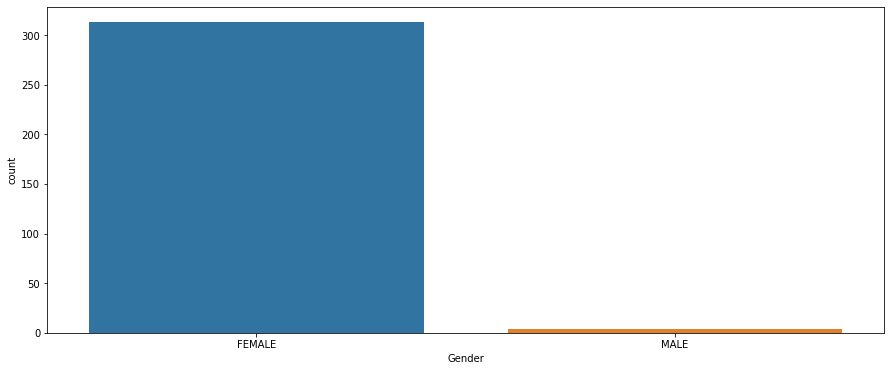

In [18]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()

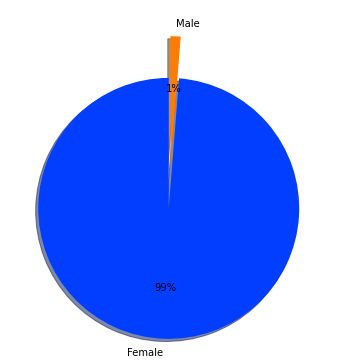

In [19]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(breast_cancer['Gender'].value_counts(), labels=['Female', 'Male'],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

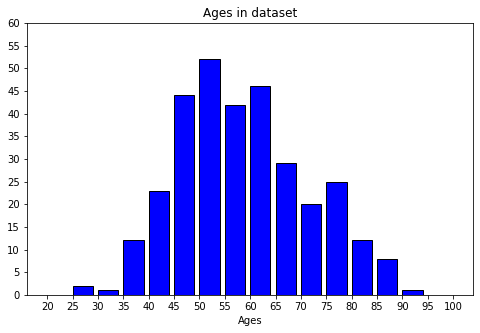

In [20]:
bins = list(range(20,105,5))
plt.figure(figsize = (8,5))
plt.hist(breast_cancer['Age'].astype(int), width = 4, align = 'mid',
bins = bins, color = 'blue', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Ages in dataset')
plt.yticks(np.arange(0,65,5))
plt.show()

In [21]:
breast_cancer.Histology.unique()

array(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Lobular Carcinoma'], dtype=object)

In [22]:
breast_cancer.Histology.value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

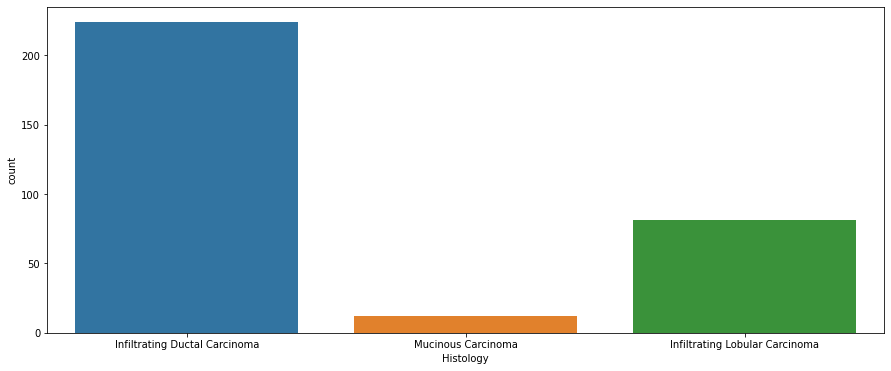

In [23]:
plt.figure(figsize=(15,6))
sns.countplot('Histology', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()

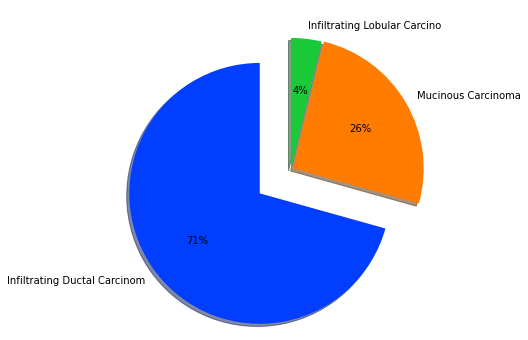

In [25]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02, 0.01]
colors = sns.color_palette('bright')
plt.pie(breast_cancer['Histology'].value_counts(), labels=['Infiltrating Ductal Carcinom', 
                                                            'Mucinous Carcinoma',
                                                            'Infiltrating Lobular Carcino'],
                                                            colors = colors, autopct = '%0.0f%%',
                                                            explode = explode, shadow = 'True',
                                                            startangle = 90)
plt.show()

In [26]:
breast_cancer.Tumour_Stage.unique()

array(['III', 'II', 'I'], dtype=object)

In [27]:
breast_cancer.Tumour_Stage.value_counts()

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

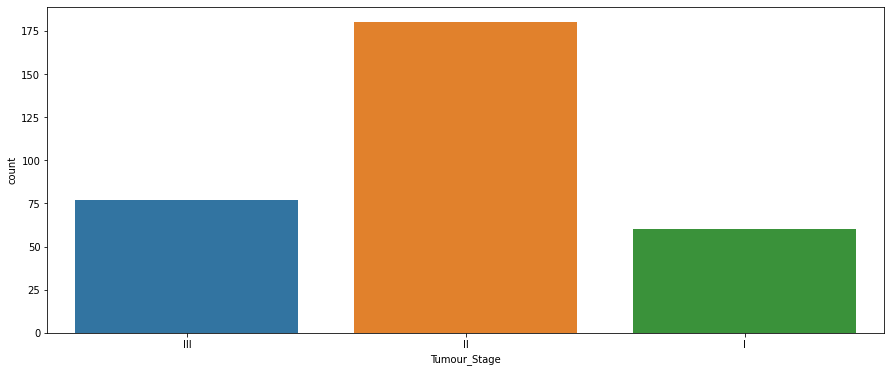

In [28]:
plt.figure(figsize=(15,6))
sns.countplot('Tumour_Stage', data = breast_cancer)
plt.xticks(rotation = 0)
plt.show()

In [29]:
breast_cancer_type_by_stage = (breast_cancer.groupby(['Histology', 'Tumour_Stage'],
as_index = False).agg(Total = ('Age
'cou
)

SyntaxError: EOL while scanning string literal (207792230.py, line 2)